CONTEO DE ELEMENTOS

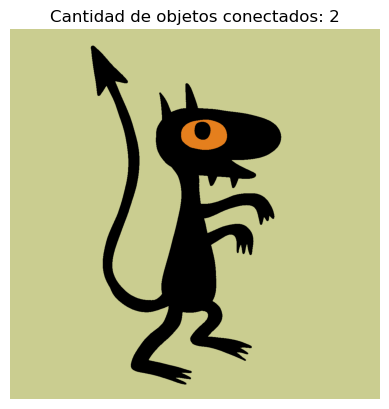

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para contar y mostrar componentes conectados
def contar_componentes(imagen):
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    _, binarizada = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    cant, region = cv2.connectedComponents(binarizada)
    
    # Generar colores aleatorios para visualizar cada componente
    colores = np.random.randint(0, 255, size=(cant, 3), dtype=np.uint8)
    colores[0] = [0, 0, 0]  
    imagen_coloreada = colores[region]  
    
    return imagen_coloreada, cant - 1  
imagen = cv2.imread("luci.jpg")

imagen_coloreada, cantidad_objetos = contar_componentes(imagen)

# Mostrar la imagen con los objetos coloreados
plt.imshow(imagen_coloreada)
plt.title(f'Cantidad de objetos conectados: {cantidad_objetos}')
plt.axis('off')
plt.show()

EJERCICIO 1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26736\2697111969.py:39: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from current font.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26736\2697111969.py:39: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  plt.tight_layout()
c:\Users\ASUS\miniconda3\envs\ker1\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\miniconda3\envs\ker1\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


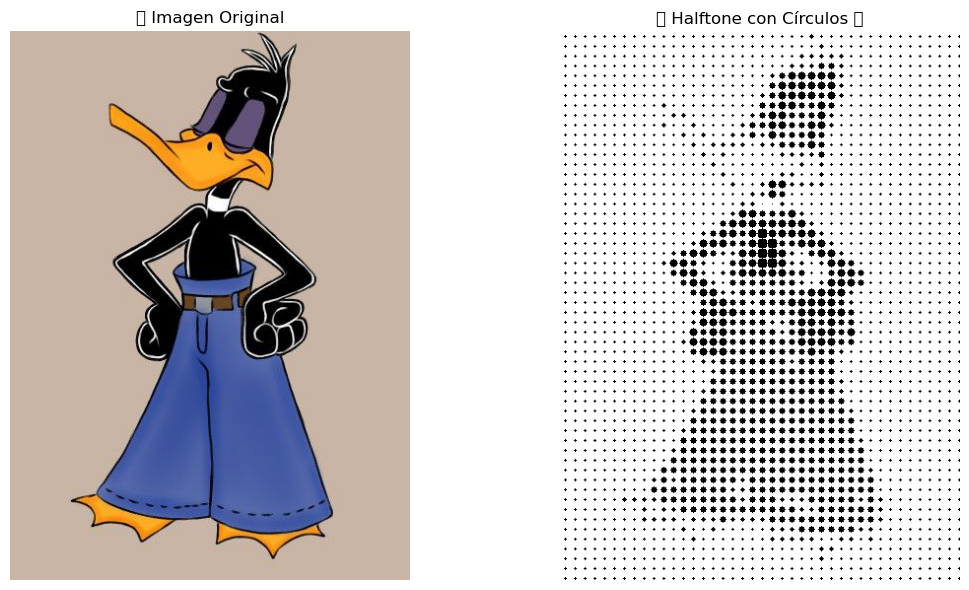

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def halftone_circles(image_path, block_size=10):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    height, width = gray.shape
    halftone_img = np.ones((height, width), dtype=np.uint8) * 255  # Fondo blanco

    for y in range(0, height, block_size):
        for x in range(0, width, block_size):
            roi = gray[y:y+block_size, x:x+block_size]
            avg = np.mean(roi)

            radius = int((1 - avg / 255) * (block_size / 2))
            center = (x + block_size // 2, y + block_size // 2)
            cv2.circle(halftone_img, center, radius, 0, -1)

    return img, halftone_img  # ahora retornamos también la imagen original

# USO
original_img, halftoned = halftone_circles('pato.jpg', block_size=10)

# Mostrar ambas imágenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title("🌈 Imagen Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(halftoned, cmap='gray')
plt.title(" Halftone con Círculos")
plt.axis('off')

plt.tight_layout()
plt.show()





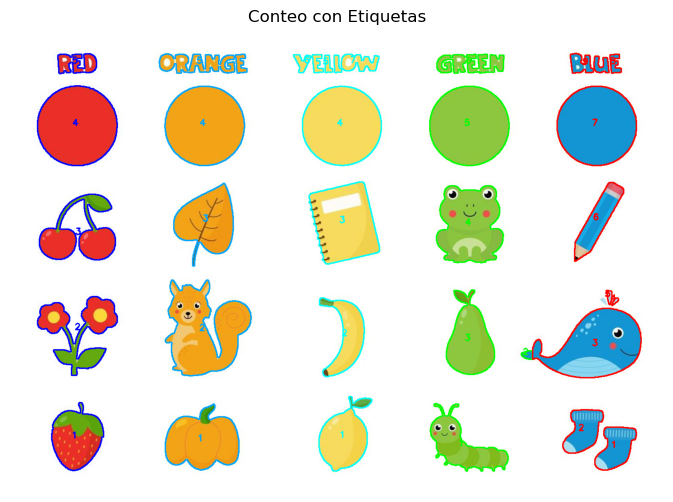


🔍 Conteo exacto por color:
Red: 5
Orange: 5
Yellow: 7
Green: 6
Blue: 9


In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contar_objetos_por_columna(img, min_area=100):
    alto, ancho = img.shape[:2]
    num_colores = 5
    ancho_columna = ancho // num_colores
    nombres_colores = ['Red', 'Orange', 'Yellow', 'Green', 'Blue']
    colores_rgb = [(255,0,0), (255,165,0), (255,255,0), (0,255,0), (0,0,255)]

    resultado_conteo = {}
    imagen_marcada = img.copy()

    for i in range(num_colores):
        x_ini = i * ancho_columna
        x_fin = (i + 1) * ancho_columna

        subimg = img[:, x_ini:x_fin]
        gris = cv2.cvtColor(subimg, cv2.COLOR_BGR2GRAY)
        _, binaria = cv2.threshold(gris, 240, 255, cv2.THRESH_BINARY_INV)

        # Morfología para eliminar ruido y cerrar huecos
        kernel = np.ones((3,3), np.uint8)
        binaria = cv2.morphologyEx(binaria, cv2.MORPH_OPEN, kernel)
        binaria = cv2.morphologyEx(binaria, cv2.MORPH_CLOSE, kernel)

        contornos, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        objetos_validos = [c for c in contornos if cv2.contourArea(c) > min_area]

        # Dibujar contornos sobre la imagen original
        for j, c in enumerate(objetos_validos):
            c_shifted = c + np.array([[[x_ini, 0]]])
            color = colores_rgb[i]
            cv2.drawContours(imagen_marcada, [c_shifted], -1, color, 2)
            # Etiquetar con número
            M = cv2.moments(c)
            if M['m00'] != 0:
                cx = int(M['m10'] / M['m00']) + x_ini
                cy = int(M['m01'] / M['m00'])
                cv2.putText(imagen_marcada, str(j+1), (cx-10, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

        resultado_conteo[nombres_colores[i]] = len(objetos_validos)

    return resultado_conteo, imagen_marcada

# Cargar imagen
imagen = cv2.imread('colores.jpg')

# Procesar
conteos, imagen_resultado = contar_objetos_por_columna(imagen)

# Mostrar imagen con marcas
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(imagen_resultado, cv2.COLOR_BGR2RGB))
plt.title("Conteo con Etiquetas")
plt.axis('off')
plt.show()

# Mostrar resultados
print("\n🔍 Conteo exacto por color:")
for color, cant in conteos.items():
    print(f"{color}: {cant}")




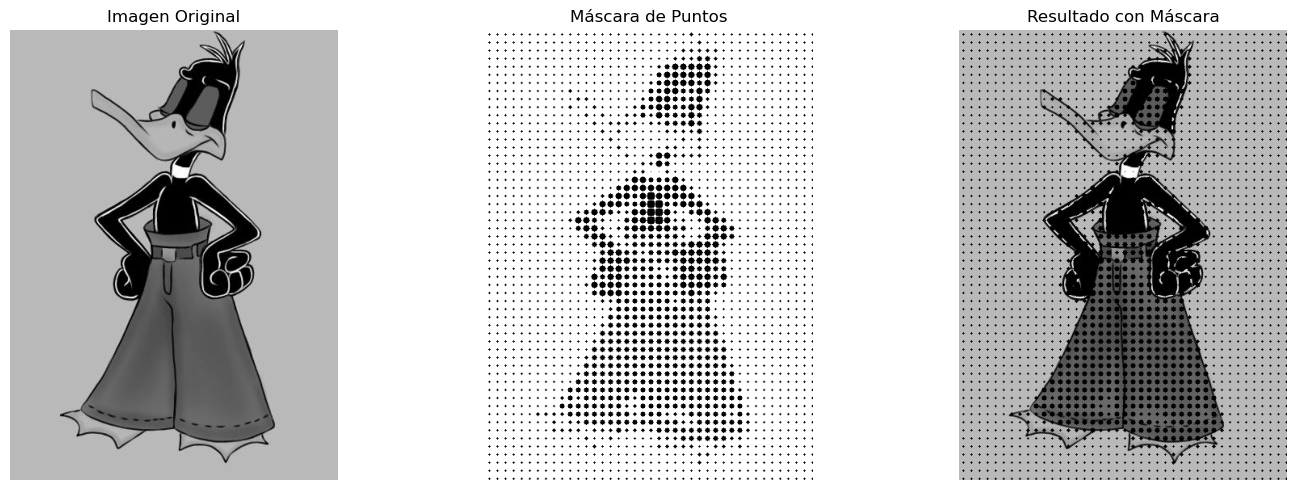

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def halftone_mask_effect(image_path, dot_spacing=10, max_radius=5):
    # Leer la imagen en escala de grises
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    h, w = img.shape

    # Crear la máscara (inicialmente en blanco)
    mask = np.ones((h, w), dtype=np.uint8) * 255

    # Generar la máscara de puntos
    for y in range(0, h, dot_spacing):
        for x in range(0, w, dot_spacing):
            block = img[y:y+dot_spacing, x:x+dot_spacing]
            if block.size == 0:
                continue
            intensity = np.mean(block)
            radius = max_radius * (1 - intensity / 255)

            if radius > 0:
                center_x = x + dot_spacing // 2
                center_y = y + dot_spacing // 2
                cv2.circle(mask, (center_x, center_y), int(radius), (0,), -1)

    # Aplicar la máscara como multiplicación sobre la imagen original (oscurece según los puntos)
    result = cv2.bitwise_and(img, mask)

    # Mostrar imagen original, máscara y resultado
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Imagen Original")
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Máscara de Puntos")
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Resultado con Máscara")
    plt.imshow(result, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Usar la función con tu imagen
halftone_mask_effect('pato.jpg', dot_spacing=10, max_radius=5)


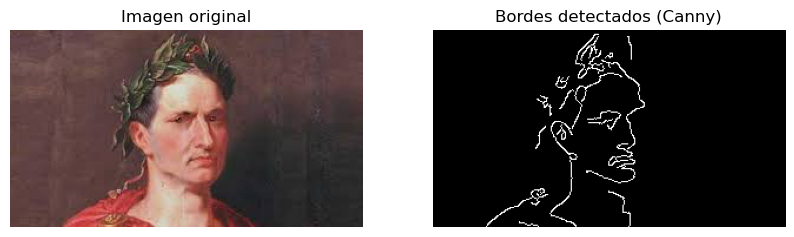

In [29]:
import cv2
import matplotlib.pyplot as plt

# Cargar imagen
img = cv2.imread('julio cesar.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar desenfoque gaussiano para suavizar
blur = cv2.GaussianBlur(gray, (5, 5), 1.4)

# Aplicar operador de Canny
edges = cv2.Canny(blur, threshold1=50, threshold2=150)

# Mostrar resultado
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen original")
plt.axis('off')

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title("Bordes detectados (Canny)")
plt.axis('off')

plt.show()


El operador de Canny es una técnica de detección de bordes que permite identificar los contornos más relevantes en una imagen. Primero, la imagen se convierte a escala de grises para simplificar el análisis, luego se aplica un desenfoque Gaussiano que reduce el ruido y evita falsos bordes. A continuación, el operador analiza los cambios bruscos de intensidad entre los píxeles, utilizando dos umbrales: uno bajo y otro alto. Los bordes que superan el umbral alto se marcan como contornos definitivos, y aquellos que superan el bajo solo se conservan si están conectados a un borde fuerte. Este proceso permite extraer las estructuras más importantes de la imagen, como los contornos del rostro, siendo ideal para proyectos de reconocimiento facial o segmentación precisa. 